In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import healpy as hp

import lsst.daf.butler as dafButler
from lsst.analysis.ap import apdb
from lsst.ap.association import AssociationTask, AssociationConfig
from lsst.dax.apdb import Apdb, ApdbCassandra, ApdbTables

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from typing import TYPE_CHECKING, cast

plt.set_loglevel('WARNING')

In [28]:
repo = 'embargo_or4'
instrument = 'LSSTComCamSim'
collections = 'u/elhoward/DM-44138/LSSTComCamSim'
schema =  f'elhoward_dm44138_LSSTComCamSim'

butler = dafButler.Butler(repo, instrument=instrument)
registry = butler.registry
skymap = butler.get("skyMap", collections=collections, skymap="ops_rehersal_prep_2k_v1")
apdbQuery = apdb.ApdbPostgresQuery(instrument=instrument, namespace=schema)

ERROR:lsst.daf.butler.direct_butler._direct_butler:Failed to instantiate Butler from config s3://embargo@rubin-summit-users/butler.yaml.


OperationalError: (psycopg2.OperationalError) connection to server at "172.24.5.152", port 5432 failed: FATAL:  no such user
connection to server at "172.24.5.152", port 5432 failed: FATAL:  no such user

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [3]:
from lsst.analysis.ap import apdbCassandra
or4_apdb_Cassandra = apdbCassandra.DbCassandraQuery(config_uri='s3://embargo@rubin-summit-users/apdb_config/cassandra/pp_apdb_lsstcomcamsim_or4.py')

In [4]:
# 3
# postgresql://usdf-prompt-processing.slac.stanford.edu/lsst-devl
# Namespace pp_apdb_lsstcomcamsim

# 4
# postgresql://usdf-prompt-processing.slac.stanford.edu/lsst-devl
# Namespace pp_apdb_lsstcomcamsim_or4

repo = '/repo/embargo'
instrument = 'LSSTComCamSim'
# collections = 'u/elhoward/DM-44138/LSSTComCamSim'
schema =  f'pp_ppdb_lsstcomcamsim_or4'

butler = dafButler.Butler(repo, instrument=instrument)
registry = butler.registry
# skymap = butler.get("skyMap", collections=collections, skymap="ops_rehersal_prep_2k_v1")
apdbQuery = apdb.ApdbPostgresQuery(instrument=instrument, namespace=schema)

In [5]:
# This is to see all of the columns avaliable
with apdbQuery.connection as connection:
    # Query to fetch all column names from the DiaObject table
    query_columns = '''
    SELECT column_name
    FROM information_schema.columns
    WHERE table_schema = 'pp_ppdb_lsstcomcamsim_or4' AND table_name = 'DiaSource';
    '''
    df_columns = pd.read_sql_query(query_columns, connection)
    print("Available columns:", df_columns['column_name'].tolist())

Available columns: ['diaSourceId', 'visit', 'detector', 'diaObjectId', 'ssObjectId', 'parentDiaSourceId', 'ssObjectReassocTime', 'midpointMjdTai', 'ra', 'raErr', 'dec', 'decErr', 'ra_dec_Cov', 'x', 'xErr', 'y', 'yErr', 'x_y_Cov', 'centroid_flag', 'apFlux', 'apFluxErr', 'apFlux_flag', 'apFlux_flag_apertureTruncated', 'snr', 'psfFlux', 'psfFluxErr', 'psfRa', 'psfRaErr', 'psfDec', 'psfDecErr', 'psfFlux_psfRa_Cov', 'psfFlux_psfDec_Cov', 'psfRa_psfDec_Cov', 'psfLnL', 'psfChi2', 'psfNdata', 'psfFlux_flag', 'psfFlux_flag_edge', 'psfFlux_flag_noGoodPixels', 'trailFlux', 'trailFluxErr', 'trailRa', 'trailRaErr', 'trailDec', 'trailDecErr', 'trailLength', 'trailLengthErr', 'trailAngle', 'trailAngleErr', 'trailFlux_trailRa_Cov', 'trailFlux_trailDec_Cov', 'trailFlux_trailLength_Cov', 'trailFlux_trailAngle_Cov', 'trailRa_trailDec_Cov', 'trailRa_trailLength_Cov', 'trailRa_trailAngle_Cov', 'trailDec_trailLength_Cov', 'trailDec_trailAngle_Cov', 'trailLength_trailAngle_Cov', 'trailLnL', 'trailChi2', 'tra

In [6]:
or4_obj = apdbQuery.load_objects(limit=1e7)

In [7]:
# We got all of them, less than 1e7 here
len(or4_obj)

1429486

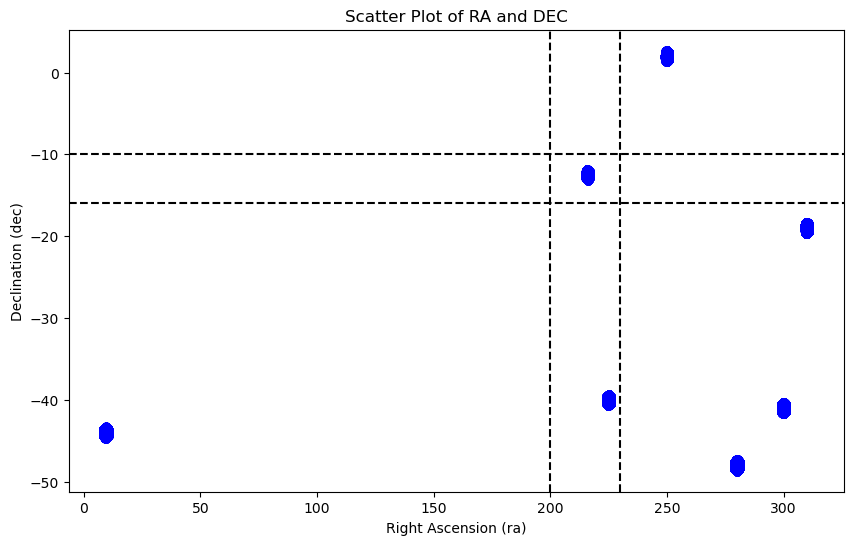

In [8]:
# Extract the columns 'ra' and 'dec'
ra = or4_obj['ra']
dec = or4_obj['dec']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ra, dec, c='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.title('Scatter Plot of RA and DEC')

plt.axhline(y=-10, color='k', ls = '--')
plt.axhline(y=-16, color='k', ls = '--')
plt.axvline(x=200, color='k', ls = '--')
plt.axvline(x=230, color='k', ls = '--')

# Show the plot
plt.show()

In [9]:
# lets look at only one field
# objects
obj4_field = or4_obj[(or4_obj['ra'] > 200) & (or4_obj['ra'] < 230) & (or4_obj['dec'] > -16) & (or4_obj['dec'] < -10)]
obj4_field



,diaObjectId,validityStart,validityEnd,ra,raErr,dec,decErr,ra_dec_Cov,radecMjdTai,pmRa,...,y_psfFluxPercentile95,y_psfFluxMin,y_psfFluxMax,y_psfFluxStetsonJ,y_psfFluxLinearSlope,y_psfFluxLinearIntercept,y_psfFluxMaxSlope,y_psfFluxErrMean,lastNonForcedSource,nDiaSources
153062,3068394109505896449,2024-06-26 02:12:25+00:00,None,215.940635,1.164427e-05,-12.980294,1.620619e-05,4.259947e-11,60487.089310,None,...,None,None,None,None,None,None,None,None,1970-01-01 00:00:00+00:00,1
153063,3068394109505896450,2024-06-26 02:49:53+00:00,None,215.932781,NaN,-12.977373,NaN,NaN,60487.115497,None,...,None,None,None,None,None,None,None,None,2024-06-26 02:48:25+00:00,6
153064,3068394109505896451,2024-06-26 02:49:53+00:00,None,215.955608,NaN,-12.984331,NaN,NaN,60487.115497,None,...,None,None,None,None,None,None,None,None,2024-06-26 02:26:58+00:00,3
153065,3068394109505896452,2024-06-26 02:32:51+00:00,None,216.003270,9.587428e-07,-12.998648,9.911652e-07,3.736781e-15,60487.103777,None,...,None,None,None,None,None,None,None,None,2024-06-26 02:26:58+00:00,3
153066,3068394109505896453,2024-06-26 02:12:25+00:00,None,215.952055,1.678011e-05,-12.981463,1.948738e-05,2.935007e-11,60487.089310,None,...,None,None,None,None,None,None,None,None,1970-01-01 00:00:00+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171479,3068394172890218585,2024-06-26 02:55:53+00:00,None,215.677023,2.335178e-05,-12.260069,2.930849e-05,-1.390424e-11,60487.119709,None,...,None,None,None,None,None,None,None,None,1970-01-01 00:00:00+00:00,1
171480,3068394172890218592,2024-06-26 02:55:53+00:00,None,215.558428,NaN,-12.258833,NaN,NaN,60487.119709,None,...,None,None,None,None,None,None,None,None,1970-01-01 00:00:00+00:00,1
171481,3068394172890218629,2024-06-26 02:55:53+00:00,None,215.749328,NaN,-12.203916,NaN,NaN,60487.119709,None,...,None,None,None,None,None,None,None,None,1970-01-01 00:00:00+00:00,1
171482,3068394172890218631,2024-06-26 02:55:53+00:00,None,215.565520,3.946260e-05,-12.211074,4.004168e-05,-9.789058e-13,60487.119709,None,...,None,None,None,None,None,None,None,None,1970-01-01 00:00:00+00:00,1


In [10]:
# no flags anymore
print(list(obj4_field.columns))

['diaObjectId', 'validityStart', 'validityEnd', 'ra', 'raErr', 'dec', 'decErr', 'ra_dec_Cov', 'radecMjdTai', 'pmRa', 'pmRaErr', 'pmDec', 'pmDecErr', 'parallax', 'parallaxErr', 'pmRa_pmDec_Cov', 'pmRa_parallax_Cov', 'pmDec_parallax_Cov', 'pmParallaxLnL', 'pmParallaxChi2', 'pmParallaxNdata', 'u_psfFluxMean', 'u_psfFluxMeanErr', 'u_psfFluxSigma', 'u_psfFluxChi2', 'u_psfFluxNdata', 'u_fpFluxMean', 'u_fpFluxMeanErr', 'u_fpFluxSigma', 'g_psfFluxMean', 'g_psfFluxMeanErr', 'g_psfFluxSigma', 'g_psfFluxChi2', 'g_psfFluxNdata', 'g_fpFluxMean', 'g_fpFluxMeanErr', 'g_fpFluxSigma', 'r_psfFluxMean', 'r_psfFluxMeanErr', 'r_psfFluxSigma', 'r_psfFluxChi2', 'r_psfFluxNdata', 'r_fpFluxMean', 'r_fpFluxMeanErr', 'r_fpFluxSigma', 'i_psfFluxMean', 'i_psfFluxMeanErr', 'i_psfFluxSigma', 'i_psfFluxChi2', 'i_psfFluxNdata', 'i_fpFluxMean', 'i_fpFluxMeanErr', 'i_fpFluxSigma', 'z_psfFluxMean', 'z_psfFluxMeanErr', 'z_psfFluxSigma', 'z_psfFluxChi2', 'z_psfFluxNdata', 'z_fpFluxMean', 'z_fpFluxMeanErr', 'z_fpFluxSigma',

In [11]:
ra_min = obj4_field['ra'].min()-0.01
ra_max = obj4_field['ra'].max()+0.01
dec_min = obj4_field['dec'].min()-0.01
dec_max = obj4_field['dec'].max()+0.01

In [12]:
with apdbQuery.connection as connection:
    src4_field = pd.read_sql_query(f'SELECT "diaSourceId", "diaObjectId", "ra", "dec", "midpointMjdTai", \
                                 "psfFlux", "psfFluxErr", \
                                 "scienceFlux", "scienceFluxErr", "snr", \
                                 "band", "time_processed", "time_withdrawn"  \
                                 FROM "{schema}"."DiaSource" \
                                 WHERE "ra" BETWEEN {ra_min} AND {ra_max} \
                                 AND "dec" BETWEEN {dec_min} AND {dec_max} \
                                 LIMIT 3000000; ''', connection)

In [13]:
i1 = 7436
i2 = 7565
# why this sometimes takes so long 
# find which ones are variable
df_single_ps1 = pd.read_parquet('/sdf/data/rubin/shared/ops-rehearsals/ops-rehearsal-4/imSim_catalogs/skyCatalogs/pointsource_'+str(i1)+'.parquet')
df_single_ps2 = pd.read_parquet('/sdf/data/rubin/shared/ops-rehearsals/ops-rehearsal-4/imSim_catalogs/skyCatalogs/pointsource_'+str(i2)+'.parquet')
# Concatenate the dataframes
df_single_ps = pd.concat([df_single_ps1, df_single_ps2], ignore_index=True)

df_single_ps1_flux = pd.read_parquet('/sdf/data/rubin/shared/ops-rehearsals/ops-rehearsal-4/imSim_catalogs/skyCatalogs/pointsource_flux_'+str(i1)+'.parquet')
df_single_ps2_flux = pd.read_parquet('/sdf/data/rubin/shared/ops-rehearsals/ops-rehearsal-4/imSim_catalogs/skyCatalogs/pointsource_flux_'+str(i2)+'.parquet')
# Concatenate the dataframes
df_single_ps_flux = pd.concat([df_single_ps1_flux, df_single_ps2_flux], ignore_index=True)

#df_single_sso = pd.read_parquet('/sdf/data/rubin/shared/ops-rehearsals/ops-rehearsal-4/imSim_catalogs/skyCatalogs/sso_'+str(i)+'.parquet')
#df_single_gal = pd.read_parquet('/sdf/data/rubin/shared/ops-rehearsals/ops-rehearsal-4/imSim_catalogs/skyCatalogs/galaxy_'+str(i)+'.parquet')
df_single_ps_var = df_single_ps[df_single_ps['is_variable']==True]

# Apply the filter to the dataframe
df_single_ps_var = df_single_ps_var[
    (df_single_ps_var['ra'] >= ra_min) & (df_single_ps_var['ra'] <= ra_max) &
    (df_single_ps_var['dec'] >= dec_min) & (df_single_ps_var['dec'] <= dec_max)]

obj4_field  = obj4_field[
    (obj4_field['ra'] >= ra_min) & (obj4_field['ra'] <= ra_max) &
    (obj4_field['dec'] >= dec_min) & (obj4_field['dec'] <= dec_max)]


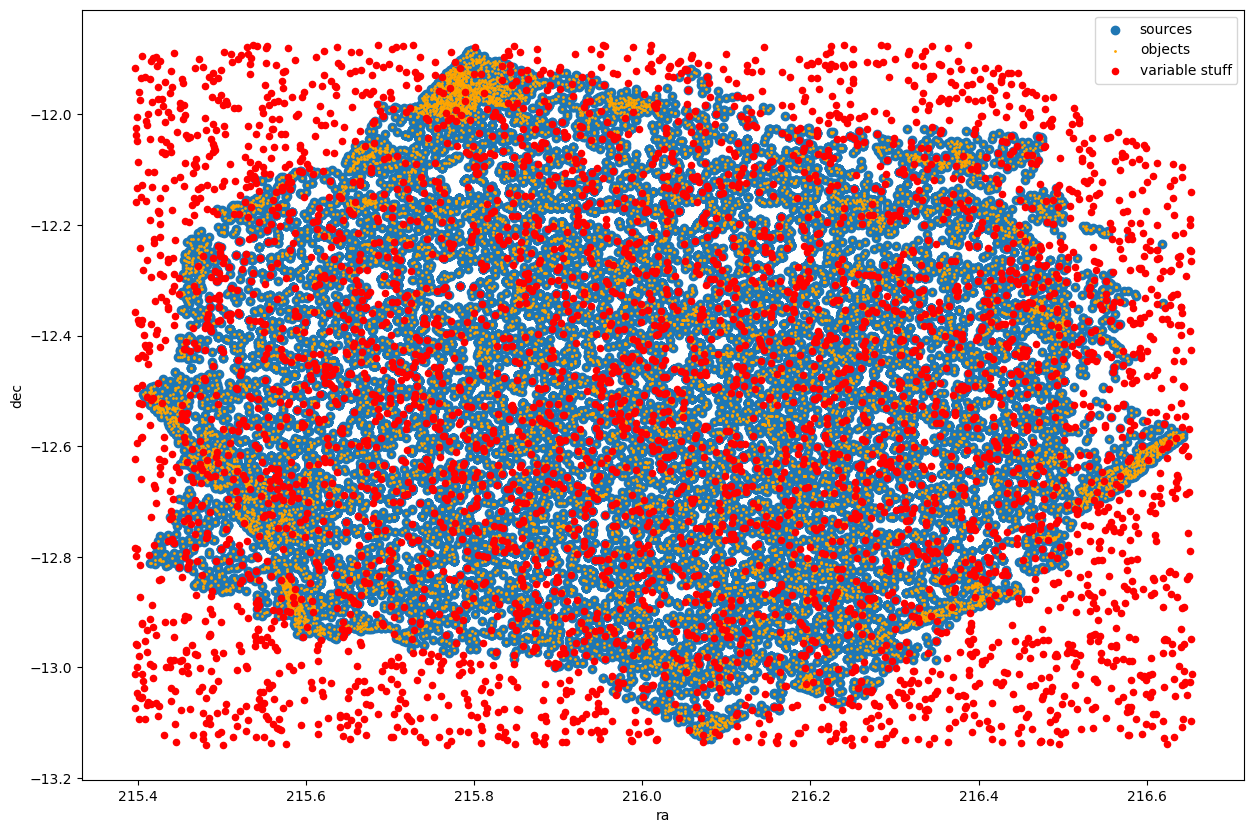

In [14]:
plt.figure(figsize=(15,10))

plt.scatter(src4_field['ra'],src4_field['dec'], label = 'sources')
plt.scatter(obj4_field['ra'],obj4_field['dec'], s=1, color = 'orange', label = 'objects')
plt.scatter(df_single_ps_var['ra'],df_single_ps_var['dec'], color = 'red', label = 'variable stuff', s=20)
plt.xlabel('ra')
plt.ylabel('dec')
plt.legend()

In [22]:
# compare number of sources

# Get column names for the DiaSource table
column_names = or4_apdb_Cassandra._apdb._schema.apdbColumnNames(ApdbTables.DiaSource)

# Build the query for the specified ra and dec range
query = or4_apdb_Cassandra._build_query(
    ApdbTables.DiaSource,
    columns=column_names,
    where='ra >= 200 AND ra <= 230 AND dec >= -16 AND dec <= -10',
    limit=100000  # Adjust the limit as needed, or remove for no limit
)

# Prepare and execute the query
statement = or4_apdb_Cassandra._apdb._preparer.prepare(query)
result = or4_apdb_Cassandra._apdb._session.execute(
    statement,
    timeout=200,
    execution_profile="read_pandas"
)

# Convert the result to a pandas DataFrame
src4_field_Cassandra = cast(pd.DataFrame, result._current_rows)

In [23]:
with apdbQuery.connection as connection:
    src4_field_postgress = pd.read_sql_query(f'SELECT "diaSourceId", "diaObjectId", "ra", "dec", "midpointMjdTai", \
                                 "psfFlux", "psfFluxErr", \
                                 "scienceFlux", "scienceFluxErr", "snr", \
                                 "band", "time_processed", "time_withdrawn"  \
                                 FROM "{schema}"."DiaSource" \
                                 WHERE "ra" BETWEEN 200 AND 230 \
                                 AND "dec" BETWEEN -16 AND -10 \
                                 LIMIT 3000000; ''', connection)

In [ ]:
len(src4_field_Cassandra)

In [24]:
print('Len src4_field_Cassandra filter is %i' % len(src4_field_Cassandra))
print('Len src4_field_postgress filter is %i' % len(src4_field_postgress))

Len src4_field_Cassandra filter is 75818
Len src4_field_postgress filter is 75818
